# Training procedure for (see details in ../training/training.ipynb)

In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
from pathlib import Path
import importlib as iml
import tifffile as tif

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

import fast.core.training as training
from fast.core import erd 
import fast.input_params as inp
from fast.utils.img_loader import load_image_list_renormalize

In [67]:
base_path = Path('selected_images/')

In [71]:
image_files_all = list(base_path.glob('*.tiff'))
images_all = load_image_list_renormalize(image_files_all, img_format='tiff')

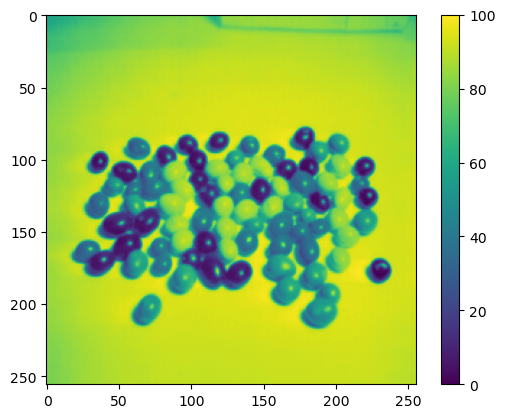

In [73]:
plt.imshow(images_all[0])
plt.colorbar()

### Generating and saving the training database.
Test c=2 only for now

In [26]:
train_params = inp.TrainingInputParams(input_images_path=base_path,
                                   output_dir=base_path, 
                                   num_repeats_per_mask=1,
                                   measurements_per_initial_mask=10,
                                   test_c_values=[2], 
                                   verbose_training=False)

In [31]:
train_data_all = training.generate_training_databases(train_params)

selected_images
[PosixPath('selected_images/4.1.08.tiff'), PosixPath('selected_images/4.2.03.tiff'), PosixPath('selected_images/4.1.05.tiff'), PosixPath('selected_images/5.3.01.tiff'), PosixPath('selected_images/4.2.06.tiff'), PosixPath('selected_images/4.1.01.tiff'), PosixPath('selected_images/5.1.11.tiff')]


  0%|          | 0/1 [00:00<?, ?it/s]

Testing for c=   2; Samples:   0%|          | 0/7 [00:00<?, ?it/s]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.


Masks:   0%|          | 0/1 [00:00<?, ?it/s]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.


Masks:   0%|          | 0/1 [00:00<?, ?it/s]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.


Masks:   0%|          | 0/1 [00:00<?, ?it/s]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.


Masks:   0%|          | 0/1 [00:00<?, ?it/s]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.


Masks:   0%|          | 0/1 [00:00<?, ?it/s]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.


Masks:   0%|          | 0/1 [00:00<?, ?it/s]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.
Reached the maximum iterations for this sampling run. Stopping scan.


### Example of training data:
1. measurement mask, 
2. the image reconstructed by interpolating the measured points, 
3. and the RDs for the unmeasured points.



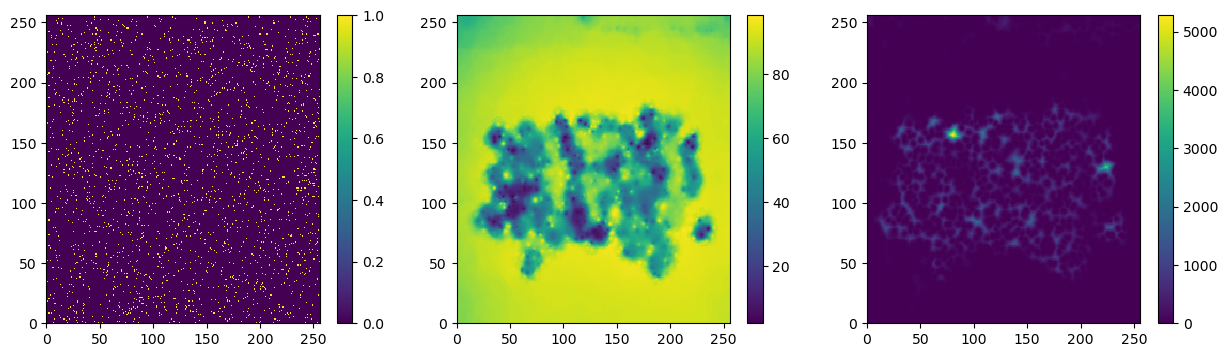

In [33]:
fig, axs = plt.subplots(1,3, figsize=[15, 4])
plt.subplot(1,3,1)
plt.pcolormesh(train_data_all[0].outputs.masks[0][::-1])
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(train_data_all[0].outputs.recons[0][::-1])
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(train_data_all[0].outputs.erds[0][::-1])
plt.colorbar()

### Generating the NN model and identifying the optimal value of $c$.

For each value of $c$:
1. Load the training database and split it into (training, validation) sets. 
2. Use the training set to train a multi-layer perceptron model (using sklearn).
3. Using this model, calculate the $R_{squared}$ for the fit of the validation set.

When we choose the value of $c$ with the highest $R_{squared}$, we get $c=2$.

In [34]:
output_path = base_path

In [35]:
val_scores = {}
for c_value in tqdm(train_params.test_c_values):

    print('test c', c_value)

    features_erds_db_path = output_path / Path(f'c_{c_value}') / 'training_database.pkl'

    val_scores[c_value] = []

    save_path = features_erds_db_path.parent / f'erd_model_relu.pkl'
    
    features_all, erds_all = training.get_features_and_erds_from_db(features_erds_db_path)
    train_feat, train_erds, val_feat, val_erds = training.training_validation_split(features_all, erds_all, training_split=0.8,random_seed=111)
    
    erd_model, _ = training.fit_erd_model((train_feat, train_erds),
                                          model_params=inp.SladsModelParams(max_iter=50),
                                          save_path=save_path,
                                          training_split=0.8, 
                                          random_seed = 111)
    score = training.validate_erd_model_r_squared((val_feat, val_erds),
                                                  erd_model_path=save_path,
                                                  random_seed = 111)
    print('R squared score', score)
    val_scores[c_value].append(score)
        
    


  0%|          | 0/1 [00:00<?, ?it/s]

test c 2
Ignoring the features db path and train/val split ratio.Directly loading the training features and erds instead.


/Users/skandel/.conda/envs/slads/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Ignoring the features db path and train/val split ratio.Directly loading the features and erds instead.
Validation score is 0.8140642284583541
R squared score 0.8140642284583541


In [36]:
val_scores

{2: [0.8140642284583541]}